In [154]:
# Crear lista con los valores de la variable independiente (Attendance)
calificaciones = [80,65,95,95,85,75,90,65,55,43,98,95,90,87,25,37,28,39,65,25,91,56,43,77,87,12,80,75]

# Crear lista con los valores de la variable dependiente (Pass: no = 0, yes = 1)
Pass = [i > 70 for i in calificaciones]
# Crear lista con los hiper-parámetros iniciales (thetas)
thetas = [-5,0.1]

# Cargar el valor del learning rate (alpha)
alpha = 0.0015

In [155]:
# Importar módulo math
import math
# Crear función lambda para la función de hipótesis
h = lambda x : 1/(1+math.exp((-thetas[0]+(-thetas[1]*x))))
# Calcular el total de muestras a partir de los datos (n)
n = len(calificaciones)

## Iteraciones
En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$ (recuerde que los estimados se obtienen con la función de hipótesis de la regresión logística):

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Además, debemos actualizar los valores de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [156]:
# Seleccionar la muestra a utilizar (Attendance o Homework)
# Implementar ciclo para iteraciones
  # Crear acumuladores
  # Barrer muestras
    # Calcular delta para theta0 y para cada muestra
    # Calcular delta para theta1 y para cada muestra
for i in range(1000):
  # Repetir procedimiento de la iteración pasada
  # Calcular delta para theta0 y para cada muestra
  delta_t0 = []
  # Calcular delta para theta1 y para cada muestra
  delta_t1 = []
  hs = []
  for x,y in zip(calificaciones,Pass):
    delta0 = h(x) - y
    delta1 = (h(x) - y)*x
    delta_t0.append(delta0)
    delta_t1.append(delta1)
    hs.append(h(x))

  # Calcular sumatorias y promedio
  der_t0 = sum(delta_t0)/n
  der_t1 = sum(delta_t1)/n

  # Actualizar theta0
  thetas[0] = thetas[0] - alpha*(der_t0)
  # Actualizar theta1
  thetas[1] = thetas[1] - alpha*(der_t1)

  # Calcular sumatorias y promedio


  # Actualizar theta0
  # Actualizar theta1

# Imprimir theta actualizado
# Preservar hiper-parámetros del modelo

## Evaluación
Antes de poder evaluar nuestro modelo, necesitamos agrupar las predicciones de cada uno, para poder compararlas:

Accuracy: 0.89
Precision: 0.8333
Recall: 1.0000
F1-Score: 0.9091


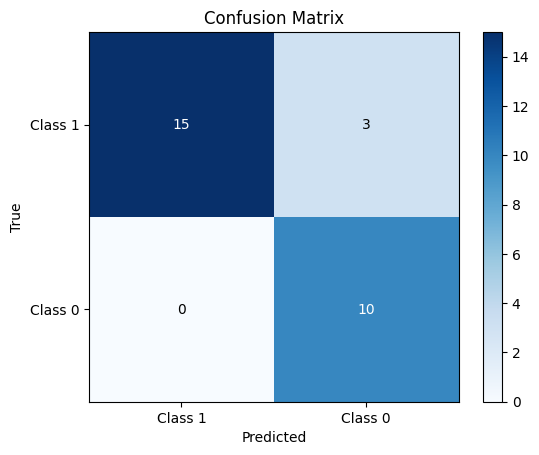

In [157]:
import numpy as np
import matplotlib.pyplot as plt

predicted_classes = hs = [round(i) for i in hs]


true_positive = np.sum((np.array(Pass) == 1) & (np.array(predicted_classes) == 1))
false_positive = np.sum((np.array(Pass) == 0) & (np.array(predicted_classes) == 1))
false_negative = np.sum((np.array(Pass) == 1) & (np.array(predicted_classes) == 0))
true_negative = np.sum((np.array(Pass) == 0) & (np.array(predicted_classes) == 0))

accuracy = np.mean(np.array(Pass) == np.array(predicted_classes))
print(f"Accuracy: {accuracy:.2f}")
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

confusion_matrix = np.array([[true_positive, false_positive], [false_negative, true_negative]])
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)

plt.text(0, 0, str(confusion_matrix[0, 0]), ha='center', va='center', color='white')
plt.text(1, 1, str(confusion_matrix[1, 1]), ha='center', va='center', color='white')
plt.text(1, 0, str(confusion_matrix[0, 1]), ha='center', va='center', color='black')
plt.text(0, 1, str(confusion_matrix[1, 0]), ha='center', va='center', color='black')

plt.xticks(tick_marks, ['Class 1', 'Class 0'])
plt.yticks(tick_marks, ['Class 1', 'Class 0'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Para estimar qué tan bueno es cada clasificador, debemos generar las matrices de confusión y las correspondientes métricas:

$accuracy = \frac{VP+VN}{VP+VN+FP+FN}$

$precision = \frac{VP}{VP+FP}$

$recall = \frac{VP}{VP+FN}$

$F1 = \frac{2\cdot precision \cdot recall}{precision+recall}$